In [220]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter

In [2]:
CUSTOMERS = pd.read_csv('CUSTOMERS.csv')
GEO_LOCATION = pd.read_csv('GEO_LOCATION.csv')
ORDER_ITEMS = pd.read_csv('ORDER_ITEMS.csv')
ORDER_PAYMENTS = pd.read_csv('ORDER_PAYMENTS.csv')
ORDER_REVIEW_RATINGS = pd.read_csv('ORDER_REVIEW_RATINGS.csv')
ORDERS = pd.read_csv('ORDERS.csv')
PRODUCTS = pd.read_csv('PRODUCTS.csv')
SELLERS = pd.read_csv('SELLERS.csv')

In [3]:
data = [CUSTOMERS,GEO_LOCATION,ORDER_ITEMS,ORDER_PAYMENTS,ORDER_REVIEW_RATINGS,ORDERS,PRODUCTS,SELLERS]

In [4]:
for col in data:
    print(col.columns.to_list())
    print('\n')
    


['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


['review_id', 'order_id', 'review_score', 'review_creation_date', 'review_answer_timestamp']


['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']




#### dropping uncessary columns in products column

In [5]:
PRODUCTS.drop(['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'],axis=1,inplace=True)
ORDER_REVIEW_RATINGS.drop(['review_id','review_creation_date','review_answer_timestamp'],axis=1,inplace=True)

In [6]:
ORDER_ITEMS['order_item_id'].value_counts()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

In [7]:
for col in data:
    print(col.isnull().sum())
    print('\n')
    data = [CUSTOMERS,GEO_LOCATION,ORDER_ITEMS,ORDER_PAYMENTS,ORDER_REVIEW_RATINGS,ORDERS,PRODUCTS,SELLERS]

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


order_id        0
review_score    0
dtype: int64


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
ord

## We will work on ORDERS and ORDER_PAYMENTS

In [8]:
ORDERS

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [9]:
ORDER_PAYMENTS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [10]:
df = pd.merge(ORDERS, ORDER_PAYMENTS, how='left', on='order_id')

In [11]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [12]:
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'], errors='coerce')
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'], errors='coerce')

In [13]:
df.drop(['order_purchase_timestamp','order_delivered_carrier_date','payment_sequential','payment_installments'],axis=1,inplace=True)

In [14]:
df['delivery_time_days'] = (df['order_delivered_customer_date']-df['order_approved_at']).dt.days

In [15]:
df.drop(['order_delivered_customer_date','order_estimated_delivery_date'],axis=1,inplace=True)

### Working on order_items

In [17]:
df1 = pd.merge(ORDER_ITEMS,PRODUCTS,how='left',on='product_id')

In [18]:
df1 = pd.merge(df1,SELLERS,how='left',on='seller_id')

In [19]:
df1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,Cool_Stuff,27277,Serilingampalle,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,Pet_Shop,3471,Akkarampalle,Andhra Pradesh
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,Furniture_Decor,37564,Goredi Chancha,Rajasthan
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,Perfumery,14403,Adilabad,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,Garden_Tools,87900,Kumhari,Chhattisgarh
...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41,Housewares,88303,Sadasivpet,Andhra Pradesh
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53,Computers_Accessories,1206,Akkarampalle,Andhra Pradesh
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95,Sports_Leisure,80610,Anakapalle,Andhra Pradesh
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72,Computers_Accessories,4733,Akkarampalle,Andhra Pradesh


In [20]:
df1.drop(['shipping_limit_date','freight_value','seller_zip_code_prefix','seller_city','product_id','seller_id'],axis=1,inplace=True)
#Dropping unwanted columns

### Merging df , df1 and CUSTOMERS to form  a final table



In [23]:
final_df = pd.merge(df,df1,how='left',on='order_id')

In [24]:
final_df = pd.merge(final_df,CUSTOMERS,how='left',on='customer_id')

In [25]:
final_df = pd.merge(final_df,ORDER_REVIEW_RATINGS,how='left',on='order_id')


In [26]:
final_df

,order_id,customer_id,order_status,order_approved_at,payment_type,payment_value,delivery_time_days,order_item_id,price,product_category_name,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,credit_card,18.12,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,voucher,2.00,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:00,voucher,18.59,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,4
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:00,UPI,141.46,12.0,1.0,118.70,Perfumery,Andhra Pradesh,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,4
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:00,credit_card,179.12,9.0,1.0,159.90,Auto,Gujarat,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 13:10:00,credit_card,195.00,22.0,1.0,174.90,Baby,Andhra Pradesh,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana,4
119147,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 15:04:00,credit_card,271.01,24.0,1.0,205.99,Home_Appliances_2,Andhra Pradesh,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan,5
119148,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,credit_card,441.16,17.0,1.0,179.99,Computers_Accessories,West Bengal,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab,2
119149,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:36:00,credit_card,441.16,17.0,2.0,179.99,Computers_Accessories,West Bengal,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab,2


In [27]:
final_df.drop(['customer_id','customer_zip_code_prefix','customer_city'],axis=1,inplace=True)

In [29]:
final_df.rename(columns={'order_item_id':'quantity'},inplace=True)

In [30]:
final_df

,order_id,order_status,order_approved_at,payment_type,payment_value,delivery_time_days,quantity,price,product_category_name,seller_state,customer_unique_id,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:00,credit_card,18.12,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,Andhra Pradesh,4
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:00,voucher,2.00,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,Andhra Pradesh,4
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:00,voucher,18.59,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,Andhra Pradesh,4
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:00,UPI,141.46,12.0,1.0,118.70,Perfumery,Andhra Pradesh,af07308b275d755c9edb36a90c618231,Chhattisgarh,4
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:00,credit_card,179.12,9.0,1.0,159.90,Auto,Gujarat,3a653a41f6f9fc3d2a113cf8398680e8,Chhattisgarh,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 13:10:00,credit_card,195.00,22.0,1.0,174.90,Baby,Andhra Pradesh,da62f9e57a76d978d02ab5362c509660,Haryana,4
119147,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 15:04:00,credit_card,271.01,24.0,1.0,205.99,Home_Appliances_2,Andhra Pradesh,737520a9aad80b3fbbdad19b66b37b30,Rajasthan,5
119148,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:00,credit_card,441.16,17.0,1.0,179.99,Computers_Accessories,West Bengal,5097a5312c8b157bb7be58ae360ef43c,Punjab,2
119149,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:00,credit_card,441.16,17.0,2.0,179.99,Computers_Accessories,West Bengal,5097a5312c8b157bb7be58ae360ef43c,Punjab,2


In [31]:
df = final_df

# 1. Perform Detailed exploratory analysis 
a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total 
products, Total categories, Total sellers, Total locations, Total channels, Total 
payment methods etc…) 

In [32]:
# Total Revenue
revenue = df['payment_value'].sum().round()
print(f'Total Revenue is :  Rs. {revenue}')

Total Revenue is :  Rs. 20581110.0


In [33]:
#Total quantity
quantity = final_df['quantity'].sum()
print(f' No.of items ordered is: {quantity}')

 No.of items ordered is: 141571.0


In [34]:
#Total products
products = PRODUCTS['product_category_name'].count()
print(f' No.of items available for sale is: {products}')

 No.of items available for sale is: 32328


In [35]:
#Total sellers
sellers = SELLERS['seller_id'].count()
print(f' No.of sellers are: {sellers}')

 No.of sellers are: 3095


In [36]:
#Total locations
sattes = len(final_df['customer_state'].unique())
print(f' No.of states are: {sattes }')



 No.of states are: 20


<AxesSubplot:xlabel='payment_type', ylabel='count'>

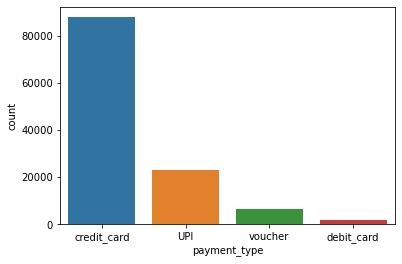

In [37]:
#Total payment methods 
pay = pd.DataFrame(final_df['payment_type'].value_counts())[:4]
pay = pay.reset_index()
pay.columns = ['payment_type', 'count']
sns.barplot(x='payment_type',y='count', data=pay)


In [38]:
#Average Order Value (AOV)
aov = (final_df.groupby('customer_unique_id')['payment_value'].sum()).mean()

print(f'The AOV is: {round(aov)}')

The AOV is: 214


In [39]:
rating = round(final_df['review_score'].mean(),3)
print(f'The average rating is: {round(aov)}')

The average rating is: 214


In [40]:
final_df

,order_id,order_status,order_approved_at,payment_type,payment_value,delivery_time_days,quantity,price,product_category_name,seller_state,customer_unique_id,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:00,credit_card,18.12,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,Andhra Pradesh,4
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:00,voucher,2.00,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,Andhra Pradesh,4
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:00,voucher,18.59,8.0,1.0,29.99,Housewares,Chhattisgarh,7c396fd4830fd04220f754e42b4e5bff,Andhra Pradesh,4
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:00,UPI,141.46,12.0,1.0,118.70,Perfumery,Andhra Pradesh,af07308b275d755c9edb36a90c618231,Chhattisgarh,4
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:00,credit_card,179.12,9.0,1.0,159.90,Auto,Gujarat,3a653a41f6f9fc3d2a113cf8398680e8,Chhattisgarh,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119146,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 13:10:00,credit_card,195.00,22.0,1.0,174.90,Baby,Andhra Pradesh,da62f9e57a76d978d02ab5362c509660,Haryana,4
119147,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 15:04:00,credit_card,271.01,24.0,1.0,205.99,Home_Appliances_2,Andhra Pradesh,737520a9aad80b3fbbdad19b66b37b30,Rajasthan,5
119148,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:00,credit_card,441.16,17.0,1.0,179.99,Computers_Accessories,West Bengal,5097a5312c8b157bb7be58ae360ef43c,Punjab,2
119149,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:00,credit_card,441.16,17.0,2.0,179.99,Computers_Accessories,West Bengal,5097a5312c8b157bb7be58ae360ef43c,Punjab,2


###  b. Understanding how many new customers acquired every month 

In [ ]:
df.dropna(subset='order_approved_at',inplace=True)
df['year'] = df['order_approved_at'].dt.year
df['month'] = df['order_approved_at'].dt.month

df['month_rank'] = df[['year','month']].apply(tuple,axis=1).rank(method='dense').astype(int)
final_df[['year','month','month_rank']].drop_duplicates().sort_values('month_rank')


In [79]:
for i in range(1, 24):
    current_month_customers = final_df[final_df['month_rank'] == i]

    if i + 1 <= 23:
        next_month_customers = final_df[final_df['month_rank'] == (i + 1)]

        new_customers = next_month_customers[~next_month_customers['customer_unique_id'].isin(current_month_customers['customer_unique_id'])]
    
        print(' ', current_month_customers['year'].drop_duplicates().values[0],
              '-', current_month_customers['month'].drop_duplicates().values[0],
              '  New Customers :', len(new_customers)
             )

  2016 - 9   New Customers : 399
  2016 - 10   New Customers : 1
  2016 - 12   New Customers : 983
  2017 - 1   New Customers : 2100
  2017 - 2   New Customers : 3258
  2017 - 3   New Customers : 2825
  2017 - 4   New Customers : 4454
  2017 - 5   New Customers : 3838
  2017 - 6   New Customers : 4857
  2017 - 7   New Customers : 5195
  2017 - 8   New Customers : 5172
  2017 - 9   New Customers : 5589
  2017 - 10   New Customers : 8966
  2017 - 11   New Customers : 6788
  2017 - 12   New Customers : 8518
  2018 - 1   New Customers : 8002
  2018 - 2   New Customers : 8672
  2018 - 3   New Customers : 8030
  2018 - 4   New Customers : 8441
  2018 - 5   New Customers : 7321
  2018 - 6   New Customers : 7202
  2018 - 7   New Customers : 7630


### c. Understand the retention of customers on month on month basis

In [62]:
for i in range(1, 24):
    current_month_customers = final_df[final_df['month_rank'] == i]
    next_month_customers = final_df[final_df['month_rank'] == (i + 1)]
    
    retained_customer = current_month_customers[current_month_customers['customer_unique_id'].isin(next_month_customers['customer_unique_id'])]
    cc_count_current = current_month_customers['customer_unique_id'].nunique()
    cc_count_retained = retained_customer['customer_unique_id'].nunique()
    
    print('Year:', current_month_customers['year'].drop_duplicates().values[0],
          'Month:', current_month_customers['month'].drop_duplicates().values[0],
          'Retention :', round(100 * (cc_count_retained / cc_count_current), 2), '%'
         )

Year: 2016 Month: 9 Retention : 0.0 %
Year: 2016 Month: 10 Retention : 0.0 %
Year: 2016 Month: 12 Retention : 100.0 %
Year: 2017 Month: 1 Retention : 0.55 %
Year: 2017 Month: 2 Retention : 0.23 %
Year: 2017 Month: 3 Retention : 0.49 %
Year: 2017 Month: 4 Retention : 0.6 %
Year: 2017 Month: 5 Retention : 0.52 %
Year: 2017 Month: 6 Retention : 0.53 %
Year: 2017 Month: 7 Retention : 0.59 %
Year: 2017 Month: 8 Retention : 0.73 %
Year: 2017 Month: 9 Retention : 0.73 %
Year: 2017 Month: 10 Retention : 0.77 %
Year: 2017 Month: 11 Retention : 0.55 %
Year: 2017 Month: 12 Retention : 0.36 %
Year: 2018 Month: 1 Retention : 0.41 %
Year: 2018 Month: 2 Retention : 0.37 %
Year: 2018 Month: 3 Retention : 0.5 %
Year: 2018 Month: 4 Retention : 0.67 %
Year: 2018 Month: 5 Retention : 0.6 %
Year: 2018 Month: 6 Retention : 0.39 %
Year: 2018 Month: 7 Retention : 0.57 %
Year: 2018 Month: 8 Retention : 0.02 %


### d. How the revenues from existing/new customers on month on month basis 

In [78]:

for i in range(1, 24):
    current_month_customers = final_df[final_df['month_rank'] == i]

    if i + 1 <= 23:
        next_month_customers = final_df[final_df['month_rank'] == (i + 1)]

        
        new_customers = next_month_customers[~next_month_customers['customer_unique_id'].isin(current_month_customers['customer_unique_id'])]
        lis.append(new_customers['payment_value'].sum().round())
        print(' ', current_month_customers['year'].drop_duplicates().values[0],
              '-', current_month_customers['month'].drop_duplicates().values[0],
              '  New Customers :', new_customers['payment_value'].sum().round()
             )

  2016 - 9   New Customers : 76406.0
  2016 - 10   New Customers : 20.0
  2016 - 12   New Customers : 182159.0
  2017 - 1   New Customers : 349788.0
  2017 - 2   New Customers : 546643.0
  2017 - 3   New Customers : 504038.0
  2017 - 4   New Customers : 731997.0
  2017 - 5   New Customers : 617057.0
  2017 - 6   New Customers : 733022.0
  2017 - 7   New Customers : 878078.0
  2017 - 8   New Customers : 921500.0
  2017 - 9   New Customers : 1133540.0
  2017 - 10   New Customers : 1581072.0
  2017 - 11   New Customers : 1083477.0
  2017 - 12   New Customers : 1402430.0
  2018 - 1   New Customers : 1307142.0
  2018 - 2   New Customers : 1496031.0
  2018 - 3   New Customers : 1469345.0
  2018 - 4   New Customers : 1536807.0
  2018 - 5   New Customers : 1294058.0
  2018 - 6   New Customers : 1329442.0
  2018 - 7   New Customers : 1261293.0


### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [85]:
sales = final_df.groupby( 'product_category_name')['payment_value'].sum().reset_index()

In [86]:
sales

,product_category_name,payment_value
0,Agro_Industry_And_Commerce,118730.61
1,Air_Conditioning,91170.66
2,Art,30992.93
3,Arts_And_Craftmanship,2326.17
4,Audio,60388.62
...,...,...
66,Stationery,318105.09
67,Tablets_Printing_Image,10042.93
68,Telephony,486935.63
69,Toys,619975.71


### f. Popular Products by month, seller, state, category. 

In [92]:
#Popular Products by month
top3_categories = pd.DataFrame()
mothly = pd.DataFrame(final_df.groupby(['month','product_category_name'])['payment_value'].sum().reset_index()).sort_values(['month','payment_value'], ascending=[True, False])

In [97]:
mothly.groupby('month').head(3)

,month,product_category_name,payment_value
13,1,Computers_Accessories,152970.54
62,1,Sports_Leisure,142482.67
6,1,Bed_Bath_Table,139277.72
81,2,Computers_Accessories,229497.83
107,2,Health_Beauty,145458.50
74,2,Bed_Bath_Table,128026.79
144,3,Computers_Accessories,186375.93
168,3,Furniture_Decor,172129.34
138,3,Bed_Bath_Table,164634.82
206,4,Bed_Bath_Table,159532.29


In [184]:
state = df.groupby(['customer_state','product_category_name'])['payment_value'].sum().reset_index()

In [166]:
state.groupby('customer_state')['customer_state','product_category_name'].head(2)

C:\Users\GL63\AppData\Local\Temp\ipykernel_23520\1905796262.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state.groupby('customer_state')['customer_state','product_category_name'].head(2)


,customer_state,product_category_name
0,Andhra Pradesh,Agro_Industry_And_Commerce
1,Andhra Pradesh,Air_Conditioning
71,Arunachal Pradesh,Agro_Industry_And_Commerce
72,Arunachal Pradesh,Air_Conditioning
125,Chhattisgarh,Agro_Industry_And_Commerce
126,Chhattisgarh,Air_Conditioning
192,Delhi,Agro_Industry_And_Commerce
193,Delhi,Air_Conditioning
255,Goa,Auto
256,Goa,Construction_Tools_Construction


In [183]:
df.sort_values('price',ascending=False)[['product_category_name','price']].head(10)

,product_category_name,price
26503,Housewares,6735.00
33970,Computers,6729.00
4162,Art,6499.00
63855,Small_Appliances,4799.00
48350,Small_Appliances,4690.00
48366,Computers,4590.00
13892,Musical_Instruments,4399.87
23267,Consoles_Games,4099.99
3197,Sports_Leisure,4059.00
68262,Watches_Gifts,3999.90


# 2. Performing Customers/sellers Segmentation 

### a. Divide the customers into groups based on the revenue generated 

In [122]:
cust = pd.DataFrame(final_df.groupby('customer_unique_id')['payment_value'].sum().reset_index())

In [ ]:
def assign_badge(x):
    if x < 500:
        return 'silver'
    elif 501 < x < 3000:
        return 'gold'
    elif 3001 < x < 10000:
        return 'platinum'
    else:
        return 'diamond'
    

cust['badge'] = cust['payment_value'].apply(assign_badge)


In [176]:
cust

,customer_unique_id,payment_value,badge
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,silver
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,silver
2,0000f46a3911fa3c0805444483337064,86.22,silver
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,silver
4,0004aac84e0df4da2b147fca70cf8255,196.89,silver
...,...,...,...
95992,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84,platinum
95993,fffea47cd6d3cc0a88bd621562a9d061,84.58,silver
95994,ffff371b4d645b6ecea244b27531430a,112.46,silver
95995,ffff5962728ec6157033ef9805bacc48,133.69,silver


In [175]:
cust.groupby('badge')['payment_value'].count()

badge
diamond        50
gold         6909
platinum      309
silver      88729
Name: payment_value, dtype: int64

## 3. Cross-Selling (Which products are selling together) 
Hint: We need to find which of the top 10 combinations of products are selling together in each transaction.  (combination of 2 or 3 buying together) 

In [ ]:

transactions = df.groupby('order_id')['product_category_name'].apply(list)


combination_counter = Counter()
for products in transactions:
    # Remove duplicates from the list of products
    products_unique = list(set(products))
    
    for i in range(2, min(len(products_unique), 4)):
        product_combinations = combinations(products_unique, i)
        
        combination_counter.update(product_combinations)


top_combinations = combination_counter.most_common(10)

In [221]:
top_combinations

[(('Bed_Bath_Table', 'Baby'), 3),
 (('Bed_Bath_Table', 'Furniture_Decor'), 3),
 (('Housewares', 'Furniture_Decor'), 2),
 ((nan, 'Bed_Bath_Table'), 2),
 (('Furniture_Decor', 'Home_Construction'), 2),
 (('Bed_Bath_Table', 'Cool_Stuff'), 2),
 (('Baby', 'Furniture_Decor'), 1),
 (('Sports_Leisure', 'Pet_Shop'), 1),
 (('Sports_Leisure', 'Furniture_Decor'), 1),
 (('Pet_Shop', 'Furniture_Decor'), 1)]

#  4. Payment Behaviour 
     a. How customers are paying? 
     b. Which payment channels are used by most customers?

In [228]:
types = pd.Series(df['payment_type'].unique())

In [229]:
types

0    credit_card
1        voucher
2            UPI
3     debit_card
4            NaN
dtype: object

In [232]:
pd.DataFrame(df['payment_type'].value_counts())

,payment_type
credit_card,87727
UPI,23159
voucher,6379
debit_card,1706


#### So they are using Credit card

#  5. Customer satisfaction towards category & product 
     a. Which categories (top 10) are maximum rated & minimum rated? 
     b. Which products (top10) are maximum rated & minimum rated? 
     c. Average rating by location, seller, product, category, month etc. 

In [241]:
#a
top_reviews = pd.DataFrame(df.groupby('product_category_name')['review_score'].mean().sort_values(ascending=False).head(10).reset_index())

top_reviews

,product_category_name,review_score
0,Cds_Dvds_Musicals,4.642857
1,Fashion_Childrens_Clothes,4.500000
2,Books_General_Interest,4.431858
3,Books_Imported,4.419355
4,Books_Technical,4.345588
5,Costruction_Tools_Tools,4.333333
6,Small_Appliances_Home_Oven_And_Coffee,4.320513
7,Food_Drink,4.312715
8,Luggage_Accessories,4.290628
9,Fashion_Sport,4.258065


In [242]:
lowest_reviews = pd.DataFrame(df.groupby('product_category_name')['review_score'].mean().sort_values(ascending=True).head(10).reset_index())

lowest_reviews

,product_category_name,review_score
0,Security_And_Services,2.500000
1,Diapers_And_Hygiene,3.256410
2,Home_Comfort_2,3.387097
3,Office_Furniture,3.516779
4,Fashion_Male_Clothing,3.531034
5,Fixed_Telephony,3.661765
6,Fashio_Female_Clothing,3.780000
7,Furniture_Mattress_And_Upholstery,3.804878
8,Audio,3.824147
9,Construction_Tools_Safety,3.828283


In [243]:
 #c. Average rating by location, seller, product, category, month etc
    

In [246]:
df.groupby('customer_state')['review_score'].mean().sort_values(ascending=False).reset_index().head(10)

,customer_state,review_score
0,Goa,4.800000
1,Punjab,4.150579
2,Uttar Pradesh,4.122260
3,Tamil Nadu,4.102626
4,Haryana,4.092175
5,Rajasthan,4.091793
6,Orissa,4.079886
7,Maharashtra,4.072222
8,Kerala,4.034676
9,Gujarat,4.022702


In [247]:
#which months had best reviews
df.groupby('order_month')['review_score'].mean().sort_values(ascending=False).reset_index().head(10)

,order_month,review_score
0,2016-12,5.000000
1,2018-07,4.212469
2,2017-08,4.193341
3,2018-08,4.191215
4,2018-06,4.177513
5,2018-05,4.114393
6,2017-09,4.101688
7,2017-06,4.096557
8,2017-05,4.094386
9,2017-07,4.078985
